# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** 13

**Напоминание:**
    
* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [1]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_precision_recall_curve, auc
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes, make_classification
from scipy.special import expit
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
from timeit import default_timer as timer
from google.colab import drive

warnings.simplefilter("ignore")
sns.set(style="darkgrid")
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/'

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [27]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

Строил графики и смотрел кол-во близких к 0 коэфф. без учёта bias

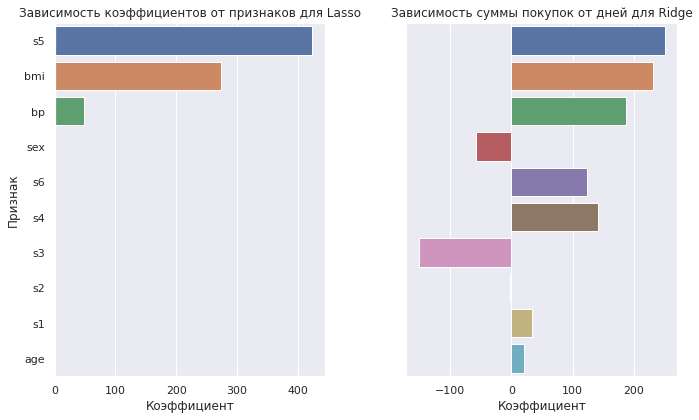

In [ ]:
def show_weights(features, weightsL, weightR):
    fig, axs = plt.subplots(figsize=(10, 6), ncols=2)
    sorted_weights = sorted(zip(weightsL, features), reverse=True)
    weightsL = [x[0] for x in sorted_weights]
    weightsR = [weightR[features.index(x[1])] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]

    sns.barplot(y=features, x=weightsL, ax=axs[0])
    axs[0].set_title('Зависимость коэффициентов от признаков для Lasso')
    axs[0].set_ylabel('Признак')
    axs[0].set_xlabel('Коэффициент')

    sns.barplot(y=features, x=weightsR, ax=axs[1])
    axs[1].set_title('Зависимость суммы покупок от дней для Ridge')
    axs[1].set_yticks([])
    axs[1].set_xlabel('Коэффициент')

    plt.tight_layout()

modelR = Ridge()
modelL = Lasso()

modelR.fit(X_train, y_train)
modelL.fit(X_train, y_train)

show_weights(data['feature_names'], modelL.coef_, modelR.coef_)

In [ ]:
border = 30
print('Кол-во близких к 0 коэффициентов:\n для Lasso: {0}\n для Ridge: {1}'.format((np.abs(modelL.coef_) < border).sum(),
                                                                                   (np.abs(modelR.coef_) < border).sum()))

Кол-во близких к 0 коэффициентов:
 для Lasso: 7
 для Ridge: 2


In [ ]:
alphas = np.logspace(-3, 3, 30)
count_nnul_L = []
count_nnul_R = []

for alpha in alphas:
    modelL = Lasso(alpha=alpha)
    modelR = Ridge(alpha=alpha)
    
    modelL.fit(X_train, y_train)
    modelR.fit(X_train, y_train)

    count_nnul_L.append((np.abs(modelL.coef_) > 0).sum())
    count_nnul_R.append((np.abs(modelR.coef_) > 0).sum())

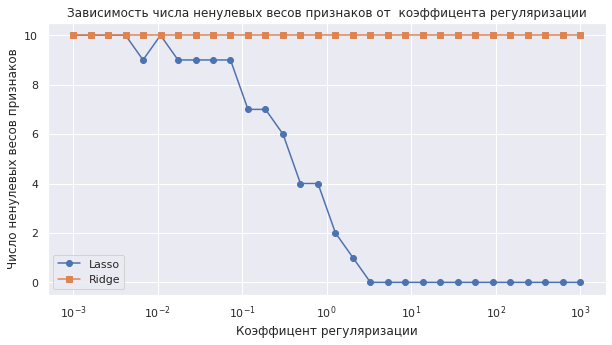

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

p1 = ax.plot(alphas, count_nnul_L, '-o')
p2 = ax.plot(alphas, count_nnul_R, '-s')

ax.set_title('Зависимость числа ненулевых весов признаков от  коэффицента регуляризации')
ax.set_ylabel('Число ненулевых весов признаков')
ax.set_xlabel('Коэффицент регуляризации')
ax.legend((p1[0], p2[0]), ('Lasso', 'Ridge'))
plt.xscale("log")

plt.show()

Результаты согласуются с моими ожиданиями, т.к. в l2 сила регуляризатора падает с уменьшением весов, а в l1 вес зануляется если модуль производной станет меньше коэффициента регуляризации

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
preds = modelR.predict(X_test)
print('RMSE: {0}\nMAE: {1}\nR^2: {2}'.format(np.around(np.sqrt(mean_squared_error(y_test, preds)), 2), 
                                             np.around(mean_absolute_error(y_test, preds), 2),
                                             np.around(r2_score(y_test, preds), 5)))

RMSE: 72.8
MAE: 59.93
R^2: 0.00195


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [28]:
alphas = np.logspace(-3, 3, 30)
schR = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
schM = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=5)
schR2 = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="r2", cv=5)

schR.fit(X_train, y_train)
schM.fit(X_train, y_train)
schR2.fit(X_train, y_train)

print("Best alpha\nRMSE: {0}\nMAE: {1}\nR^2: {2}".format(np.around(schR.best_params_["alpha"], 4), 
                                             np.around(schM.best_params_["alpha"], 4),
                                             np.around(schR2.best_params_["alpha"], 4)))

Best alpha
RMSE: 0.0026
MAE: 0.001
R^2: 0.0026


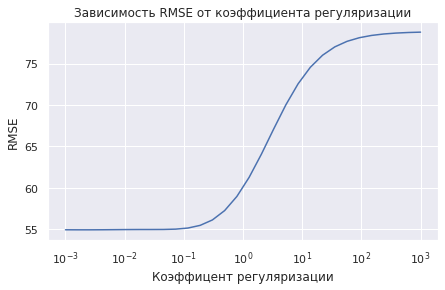

In [29]:
fig, ax = plt.subplots(figsize=(7, 4))

p1 = ax.plot(alphas, np.sqrt(-schR.cv_results_['mean_test_score']))

ax.set_title('Зависимость RMSE от коэффициента регуляризации')
ax.set_ylabel('RMSE')
ax.set_xlabel('Коэффицент регуляризации')
plt.xscale("log")

plt.show()

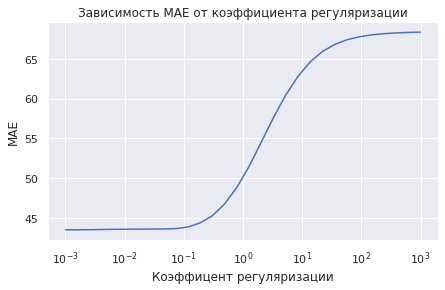

In [30]:
fig, ax = plt.subplots(figsize=(7, 4))

p1 = ax.plot(alphas, -schM.cv_results_['mean_test_score'])

ax.set_title('Зависимость MAE от коэффициента регуляризации')
ax.set_ylabel('MAE')
ax.set_xlabel('Коэффицент регуляризации')
plt.xscale("log")

plt.show()

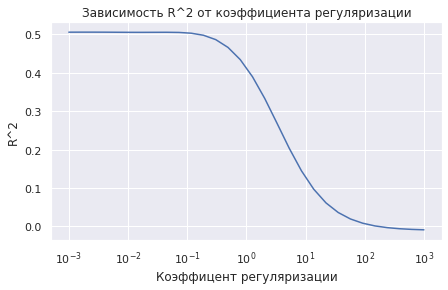

In [31]:
fig, ax = plt.subplots(figsize=(7, 4))

p1 = ax.plot(alphas, schR2.cv_results_['mean_test_score'])

ax.set_title('Зависимость R^2 от коэффициента регуляризации')
ax.set_ylabel('R^2')
ax.set_xlabel('Коэффицент регуляризации')
plt.xscale("log")

plt.show()

In [32]:
print('Ridge с лучшим alpha \ default\n'
        'RMSE: {0} \ 72.8\n'
        'MAE: {1} \ 59.93\n'
        'R^2: {2} \ 0.002'.format(np.around(np.sqrt(mean_squared_error(y_test, schR.predict(X_test))), 2),
                                  np.around(mean_absolute_error(y_test, schM.predict(X_test)), 2),
                                  np.around(r2_score(y_test, schR.predict(X_test)), 3)))

Ridge с лучшим alpha \ default
RMSE: 55.81 \ 72.8
MAE: 47.16 \ 59.93
R^2: 0.414 \ 0.002


Качество выросло заметно

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [59]:
oof_preds = cross_val_predict(Ridge(alpha=schR.best_params_['alpha']),
                              X_train,
                              y_train,
                              cv=KFold(n_splits=X_train.shape[0]),
                              n_jobs=-1)
errors = (y_train - oof_preds) ** 2

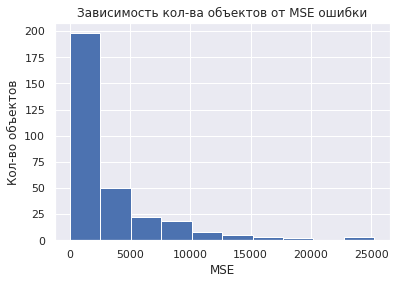

In [60]:
fig, ax = plt.subplots()
p1 = ax.hist(errors)
ax.set_title('Зависимость кол-ва объектов от MSE ошибки')
ax.set_ylabel('Кол-во объектов')
ax.set_xlabel('MSE')
plt.show()

Видим, что есть выбросы, для которых MSE > 20k

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [61]:
border = 20000
ind_outliers = np.where(errors > border)[0]
mask = np.isin(range(X_train.shape[0]), ind_outliers) == False
Xm_train = X_train[mask]
ym_train = y_train[mask]

In [62]:
alphas = np.logspace(-3, 3, 30)
schR = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
schM = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=5)
schR2 = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="r2", cv=5)

schR.fit(Xm_train, ym_train)
schM.fit(Xm_train, ym_train)
schR2.fit(Xm_train, ym_train)

print('Ridge без выбросов \ с выбросами\n'
        'RMSE: {0} \ 55.81\n'
        'MAE: {1} \ 47.16\n'
        'R^2: {2} \ 0.41'.format(np.around(np.sqrt(mean_squared_error(y_test, schR.predict(X_test))), 2),
                                 np.around(mean_absolute_error(y_test, schM.predict(X_test)), 2),
                                 np.around(r2_score(y_test, schR.predict(X_test)), 2)))

Ridge без выбросов \ с выбросами
RMSE: 56.01 \ 55.81
MAE: 47.06 \ 47.16
R^2: 0.41 \ 0.41


**Ответ:** Видим, что MAE уменьшилось, а RMSE увеличилось. По идее RMSE тоже должно было уменьшиться, т.к. Ridge оптимизирует MSE + l2.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

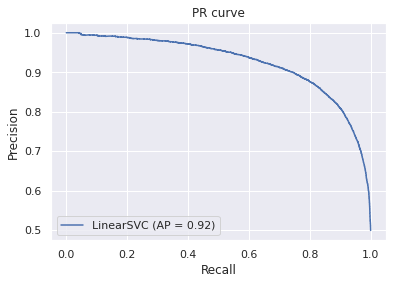

In [ ]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('PR curve')
plt.show()

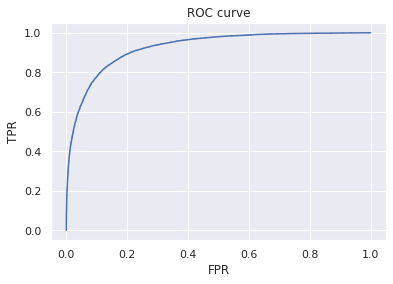

In [ ]:
preds = expit(svc.decision_function(X_test))
rocp = roc_curve(y_test, preds)
fig, ax = plt.subplots()
p1 = ax.plot(rocp[0], rocp[1])
ax.set_title('ROC curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
plt.show()

In [ ]:
roc_sc = roc_auc_score(y_test, preds)
pr_sc = auc(disp.recall, disp.precision)

print('ROC-AUC: {0}\nPR-AUC: {1}'.format(np.around(roc_sc, 2), np.around(pr_sc, 2)))

ROC-AUC: 0.93
PR-AUC: 0.92


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

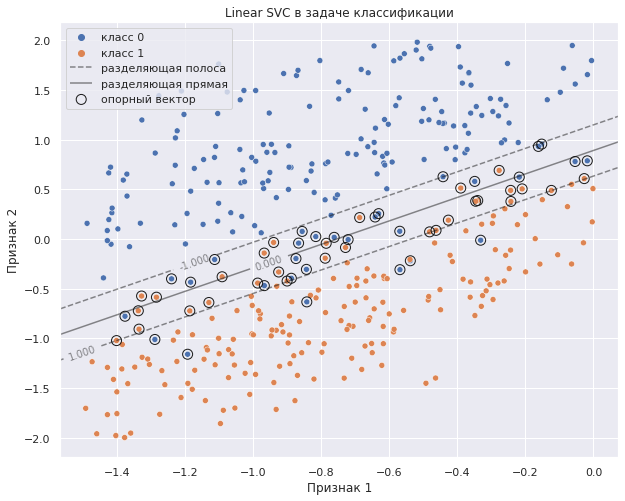

In [ ]:
svc = SVC(kernel='linear', C=100)
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    random_state=90, n_clusters_per_class=1, class_sep=0.8)
mask = (X[:, 0] >= -1.5) & (X[:, 0] < 0) & (X[:, 1] >= -2) & (X[:, 1] < 2)
X = X[mask, :]
y = y[mask]
data = X

classes = y
classes_names = ['класс ' + str(x) for x in classes]
y = X[:, 1]
X = X[:, 0]

svc.fit(data, classes)

fig = plt.figure(figsize=(10, 8))
sns.scatterplot(X, y, hue=classes_names)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

ax.legend()
cs = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], )
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='опорный вектор')

plt.clabel(cs, inline=1, fontsize=10)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Linear SVC в задаче классификации')

labels = ['разделяющая полоса', 'разделяющая прямая']
for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

plt.legend(loc='upper left')
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [63]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        mask = (preds >= l) & (preds <= r)
        bin_real_ratios.append(np.sum(y_test[mask]) / np.sum(mask))
    plt.plot([bin_middle_points[0], bin_middle_points[-1]],
             [bin_real_ratios[0], bin_real_ratios[-1]], 'c--')
    plt.plot(bin_middle_points, bin_real_ratios)

def calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        mask = (preds >= l) & (preds <= r)
        bin_real_ratios.append(np.sum(y_test[mask]) / np.sum(mask))
    return bin_middle_points, bin_real_ratios

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [64]:
X, y = make_classification(
    n_samples=10000, n_features=20, n_informative=10, n_redundant=10,
    random_state=55) #55

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(n_jobs=-1)
svc = SVC(kernel='linear', cache_size=1000, random_state=10)
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)

predl = logreg.predict_proba(X_test)[:, 1]
preds = expit(svc.decision_function(X_test))

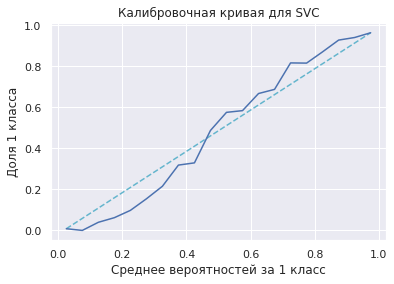

In [65]:
plot_calibration_curve(y_test, preds)
plt.title('Калибровочная кривая для SVC')
plt.xlabel('Среднее вероятностей за 1 класс')
plt.ylabel('Доля 1 класса')
plt.show()

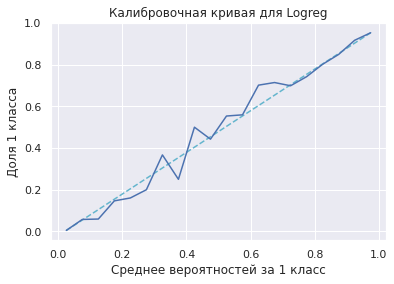

In [66]:
plot_calibration_curve(y_test, predl)
plt.title('Калибровочная кривая для Logreg')
plt.xlabel('Среднее вероятностей за 1 класс')
plt.ylabel('Доля 1 класса')
plt.show()

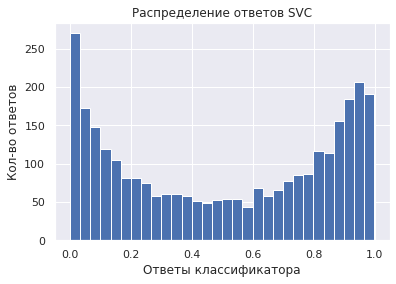

In [ ]:
plt.hist(preds, bins=30)
plt.title('Распределение ответов SVC')
plt.xlabel('Ответы классификатора')
plt.ylabel('Кол-во ответов')
plt.show()

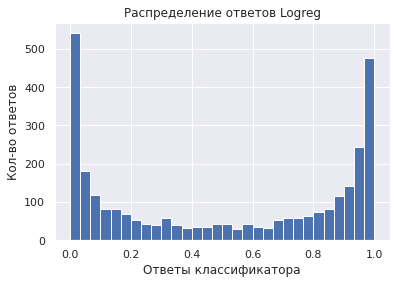

In [ ]:
plt.hist(predl, bins=30)
plt.title('Распределение ответов Logreg')
plt.xlabel('Ответы классификатора')
plt.ylabel('Кол-во ответов')
plt.show()

Распределения ответов отличаются значениями на концах и серединой. Это может быть обусловленно тем, что SVM ориентируестя на опорные вектора, близкие к границе.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

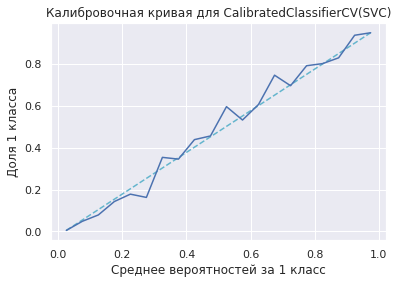

In [ ]:
clsvc = CalibratedClassifierCV(SVC(kernel='linear', cache_size=1000, random_state=10))
clsvc.fit(X_train, y_train)
predcs = clsvc.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, predcs)
plt.title('Калибровочная кривая для CalibratedClassifierCV(SVC)')
plt.xlabel('Среднее вероятностей за 1 класс')
plt.ylabel('Доля 1 класса')
plt.show()

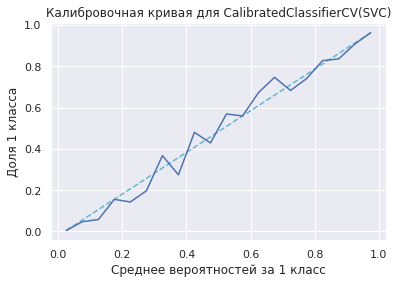

In [69]:
clsvc = CalibratedClassifierCV(LogisticRegression(n_jobs=-1))
clsvc.fit(X_train, y_train)
predcs = clsvc.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, predcs)
plt.title('Калибровочная кривая для CalibratedClassifierCV(SVC)')
plt.xlabel('Среднее вероятностей за 1 класс')
plt.ylabel('Доля 1 класса')
plt.show()

Для svс она улучшилась, для logreg нет.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
data = pd.read_csv(path + 'train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(X_train, y_train)
predl = logreg.predict_proba(X_test)[:, 1]

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

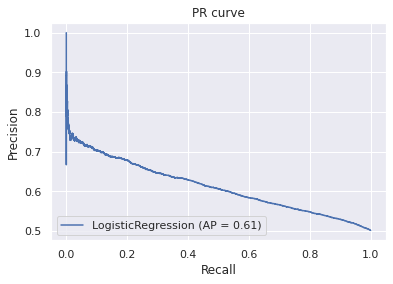

In [ ]:
disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('PR curve')
plt.show()

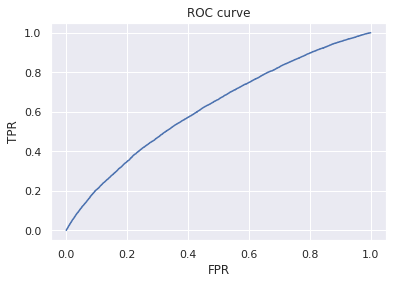

In [ ]:
rocp = roc_curve(y_test, predl)
fig, ax = plt.subplots()
p1 = ax.plot(rocp[0], rocp[1])
ax.set_title('ROC curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
plt.show()

In [ ]:
roc_sc = roc_auc_score(y_test, predl)
pr_sc = auc(disp.recall, disp.precision)

print('ROC-AUC: {0}\nPR-AUC: {1}'.format(np.around(roc_sc, 2), np.around(pr_sc, 2)))

ROC-AUC: 0.62
PR-AUC: 0.61


**Ответ:** PR кривая: лего заметить, что наклон прямой -0.25 -> если разбить на бины Recall с длиной бина 4, то в нём будут 5 истинных нулей и 4 истинных единицы. Причём они будет чередоваться начиная с единиц. Т.е. если отранжировать уверенность классификатора по убыванию, то в начале будут идти концентрация истинных 1, потом пойдёт чередование единиц и нулей по приведенной выше схеме.  
Recall - это кол-во положительных ROC кривая бизка к диагонали -> метод не далёк от рандомного предсказания ответов. 

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [ ]:
n_epochs = 1000
alphas = np.logspace(-5, 0, 10)
loss_log_m = np.zeros((len(alphas), 2, n_epochs))
ind = 0
for alpha in alphas:
    sgd = SGDClassifier(loss = 'log', alpha=alpha, n_jobs=-1)
    for epoch in range(n_epochs):
        sgd.partial_fit(X_train, y_train, np.unique(y_train))
        loss_log_m[ind, 0, epoch] = log_loss(y_train, sgd.predict_proba(X_train))
        loss_log_m[ind, 1, epoch] = log_loss(y_test, sgd.predict_proba(X_test))
    ind += 1

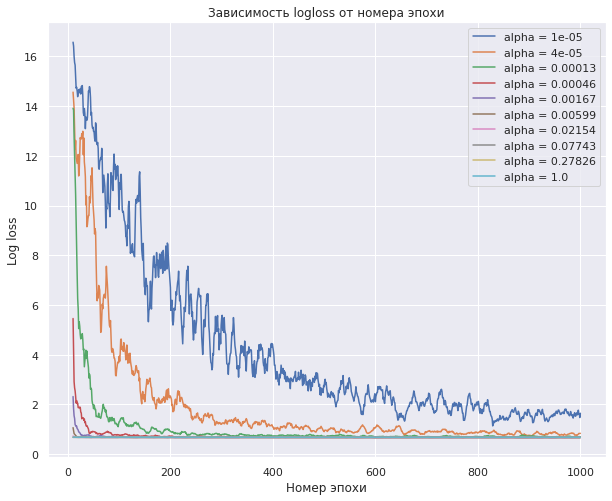

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(len(alphas)):
    plt.plot(range(1, n_epohs + 1), pd.DataFrame(loss_log_m[i, 0, :]).rolling(10).mean().values, label='alpha = ' + str(np.around(alphas[i], 5)))
    #plt.plot(range(1, n_epohs + 1), pd.DataFrame(loss_log_m[i, 1, :]).rolling(10).mean().values)
plt.legend(loc='upper right')
plt.title('Зависимость logloss от номера эпохи')
plt.xlabel('Номер эпохи')
plt.ylabel('Log loss')
plt.show()

Лосс на валидационной выборке не совпал с лоссом на обучающей, только при alpha, близких к 1. Поэтому на графике только loss на X_train.  
Я усреднил лосс с помощью окон размера 10. Alpha близкие к 1, показали лучше результаты. Возможно, из-за того, что маленькая alpha позволяют весам быть достаточно большими -> $\sigma(-<w, x>y)$ либо  ~ 0, либо ~ 1; т.е. или перескакиваем "хороший" минимум, или застреваем в локальном минимуме. В случае малых весов $\sigma(...)$ ~ $1/2$, что даёт более сбалансированную стратегию.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(X_train, y_train)
predl = logreg.predict_proba(X_test)[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}'.format(np.around(roc_sc, 4)))

ROC-AUC: 0.6239


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
def one_h_enc(data, columns):
    aug_data = deepcopy(data)
    for column in columns:
        unuiq = pd.unique(data[column])
        for val in unuiq:
            aug_data[column + '_' + str(val)] = (aug_data[column] == val).astype(int).values
    aug_data.drop(columns=columns, inplace=True)
    return aug_data

cat_f = data.columns[data.nunique().index.str.contains('cat')].values
Xa_train = one_h_enc(X_train, cat_f)
Xa_test = one_h_enc(X_test, cat_f)

logreg = LogisticRegression(n_jobs=-1, random_state=10)

In [ ]:
%timeit logreg.fit(Xa_train, y_train)

1 loop, best of 3: 46.3 s per loop


In [ ]:
predl = logreg.predict_proba(Xa_test)[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}'.format(np.around(roc_sc, 4)))

ROC-AUC: 0.6155


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [ ]:
tdata = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['target'])], axis=1)
mX_train = deepcopy(X_train)
mX_test = deepcopy(X_test)
m_y = y_train.mean()

for col in cat_f:
    gr = tdata.groupby(col).agg(['mean'])
    mean = gr[('target',  'mean')]
    mX_train[col + '_m'] = mX_train[col].map(mean).fillna(m_y)
    mX_test[col + '_m'] = mX_test[col].map(mean).fillna(m_y)

    div_train = (mX_train[col + '_m'].quantile(0.95) - mX_train[col + '_m'].quantile(0.05))/2
    div_test = (mX_test[col + '_m'].quantile(0.95) - mX_test[col + '_m'].quantile(0.05))/2
    mX_train[col + '_m'] += np.random.normal(0, div_train, mX_train[col + '_m'].shape[0])
    mX_test[col + '_m'] += np.random.normal(0, div_test, mX_test[col + '_m'].shape[0])

    # mX_train[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_train[col + '_m'].shape[0]))
    # mX_test[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_test[col + '_m'].shape[0]))
    
    mX_train[col + '_m'][mX_train[col + '_m'] < 0] = 0
    mX_test[col + '_m'][mX_test[col + '_m'] < 0] = 0
    mX_train[col + '_m'][mX_train[col + '_m'] > 1] = 1
    mX_test[col + '_m'][mX_test[col + '_m'] > 1] = 1


In [ ]:
logregm = LogisticRegression(n_jobs=-1, random_state=10)
%timeit logregm.fit(mX_train, y_train)

1 loop, best of 3: 13.1 s per loop


In [ ]:
predm = logregm.predict_proba(mX_test)[:, 1]
roc_scm = roc_auc_score(y_test, predm)
print('ROC-AUC: {0}'.format(np.around(roc_scm, 4)))

ROC-AUC: 0.6245


**Ответ**: Качество выросло. Я добавлял шум, исходя из интерквантильного размаха. Обучается в 4x раза быстрее, чем one-hot-encoding. Качество, по идее, в one-hot должно быть выше, т.к. добавляя размерность мы упрощаем задачу для линейных моделей.

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [ ]:
tdata = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['target'])], axis=1)
mX_train = deepcopy(X_train)
mX_test = deepcopy(X_test)
m_y = y_train.mean()

for col in cat_f:
    last_counters = dict()
    for val in pd.unique(mX_train[col]):
        last_counters[(val)] = 0
    mX_train[col + '_m'] = m_y
    mX_test[col + '_m'] = m_y
    
    for n_sample in range(1, len(mX_train)):
        gr = tdata.iloc[:n_sample, :].groupby(col).agg(['mean'])
        mean = gr[('target',  'mean')]
        pre_val = mX_train[col + '_m'].iloc[n_sample] 
        if pre_val not in mean.index:
            value = m_y
        else:
            value = mean[mX_train[col + '_m'].iloc[n_sample]]
        mX_train[col + '_m'].iloc[n_sample] = value
        last_counters[(pre_val)] = value
    
    last_counters_s = pd.Series(data=last_counters.values(), index=[cat_val[0] for cat_val in last_counters.index()])
    mX_test[col + '_m'].iloc[n_sample] = mX_test[col].map(last_counters_s).fillna(m_y)

    div_train = (mX_train[col + '_m'].quantile(0.95) - mX_train[col + '_m'].quantile(0.05))/2
    div_test = (mX_test[col + '_m'].quantile(0.95) - mX_test[col + '_m'].quantile(0.05))/2
    mX_train[col + '_m'] += np.random.normal(0, div_train, mX_train[col + '_m'].shape[0])
    mX_test[col + '_m'] += np.random.normal(0, div_test, mX_test[col + '_m'].shape[0])

    # mX_train[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_train[col + '_m'].shape[0]))
    # mX_test[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_test[col + '_m'].shape[0]))
    
    mX_train[col + '_m'][mX_train[col + '_m'] < 0] = 0
    mX_test[col + '_m'][mX_test[col + '_m'] < 0] = 0
    mX_train[col + '_m'][mX_train[col + '_m'] > 1] = 1
    mX_test[col + '_m'][mX_test[col + '_m'] > 1] = 1


In [ ]:
logregm = LogisticRegression(n_jobs=-1, random_state=10)
%timeit logregm.fit(mX_train, y_train)

1 loop, best of 3: 13.1 s per loop


In [ ]:
predm = logregm.predict_proba(mX_test)[:, 1]
roc_scm = roc_auc_score(y_test, predm)
print('ROC-AUC: {0}'.format(np.around(roc_scm, 4)))

ROC-AUC: 0.6245


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
tdata = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['target'])], axis=1)
mX_train = deepcopy(X_train)
mX_test = deepcopy(X_test)
m_y = y_train.mean()
c = 10

for col in cat_f:
    gr = tdata.groupby(col).agg(['mean', 'count'])
    mean = gr[('target',  'mean')]
    count = gr[('target',  'count')]
    prior = np.random.uniform()
    c = np.random.uniform(high=10)
    #prior = m_y
    map_values = (mean * count + c * prior) / (count + c)
    mX_train[col + '_m'] = mX_train[col].map(mean).fillna(m_y)
    mX_test[col + '_m'] = mX_test[col].map(mean).fillna(m_y)

    div_train = (mX_train[col + '_m'].quantile(0.95) - mX_train[col + '_m'].quantile(0.05))/2
    div_test = (mX_test[col + '_m'].quantile(0.95) - mX_test[col + '_m'].quantile(0.05))/2
    mX_train[col + '_m'] += np.random.normal(0, div_train, mX_train[col + '_m'].shape[0])
    mX_test[col + '_m'] += np.random.normal(0, div_test, mX_test[col + '_m'].shape[0])

    # mX_train[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_train[col + '_m'].shape[0]))
    # mX_test[col + '_m'] *= (1 + 0.5 * np.random.randn(mX_test[col + '_m'].shape[0]))
    
    mX_train[col + '_m'][mX_train[col + '_m'] < 0] = 0
    mX_test[col + '_m'][mX_test[col + '_m'] < 0] = 0
    mX_train[col + '_m'][mX_train[col + '_m'] > 1] = 1
    mX_test[col + '_m'][mX_test[col + '_m'] > 1] = 1


In [ ]:
logregm = LogisticRegression(n_jobs=-1, random_state=10)
logregm.fit(mX_train, y_train)
predm = logregm.predict_proba(mX_test)[:, 1]
roc_scm = roc_auc_score(y_test, predm)
print('ROC-AUC: {0}'.format(np.around(roc_scm, 4)))

ROC-AUC: 0.6244


Качество сравнимо с предыдущим методом

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ**:
_Плюсы_:
* быстрее вычисляются
* существенно меньше размерность пространства
* на нашем датасете лучше качество при хороших параметрах подбора  
  _Минусы_:
* усреденив значения 2-ух объектов, можем получить совпадающее значение с 3-им объектом, у которого категориальное значение может не совпадать ни с 1-ым, ни со 2-ым. Т.е. нет понятия "независимости"
* есть условный порядок категориальных значений
* переобучение 

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [20]:
data = pd.read_csv(path + 'train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [3]:
def one_h_enc(data, columns):
    aug_data = deepcopy(data)
    for column in columns:
        unuiq = pd.unique(data[column])
        for val in unuiq:
            aug_data[column + '_' + str(val)] = (aug_data[column] == val).astype(int).values
    aug_data.drop(columns=columns, inplace=True)
    return aug_data

cat_f = data.columns[data.nunique().index.str.contains('cat')].values
Xa_train = one_h_enc(X_train, cat_f)
Xa_test = one_h_enc(X_test, cat_f)
print('Кол-во признаков = ', Xa_train.shape[1])

Кол-во признаков =  227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train, y_train)
predl = logreg.predict_proba(Xa_test)[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}'.format(np.around(roc_sc, 4)))

ROC-AUC: 0.5924


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [4]:
start = timer()
lasso = Lasso(random_state=10)
lasso.fit(Xa_train, y_train)
best_col = np.where(np.isin(np.arange(227), np.argpartition(np.abs(lasso.coef_), np.arange(227 - 200))[np.arange(227 - 200)]) == False)[0]
end = timer()

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train.iloc[:, best_col], y_train)
predl = logreg.predict_proba(Xa_test.iloc[:, best_col])[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}\nВремя отбора: {1} c.'.format(np.around(roc_sc, 4),
                                                  np.around(end - start, 4)))

ROC-AUC: 0.5063
Время отбора: 1.1811 c.


In [ ]:
start = timer()
ridge = Ridge(random_state=10)
ridge.fit(Xa_train, y_train)
best_col = np.where(np.isin(np.arange(227), np.argpartition(np.abs(ridge.coef_), np.arange(227 - 200))[np.arange(227 - 200)]) == False)[0]
end = timer()

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train.iloc[:, best_col], y_train)
predl = logreg.predict_proba(Xa_test.iloc[:, best_col])[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}\nВремя отбора: {1} c.'.format(np.around(roc_sc, 4),
                                                  np.around(end - start, 4)))

ROC-AUC: 0.5981
Время отбора: 2.0816 c.


Качество выросло

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [92]:
rel_f = X_train.columns.values[np.isin(X_train.columns.values, cat_f) == False]
Xa_train = deepcopy(X_train[rel_f])
Xa_test = deepcopy(X_test[rel_f])

Xa_train=(Xa_train-Xa_train.mean())/Xa_train.std()
Xa_test=(Xa_test-Xa_test.mean())/Xa_test.std()

Xa_train = pd.concat((Xa_train.reset_index(drop=True), one_h_enc(X_train[cat_f], cat_f).reset_index(drop=True)), axis=1)
Xa_test = pd.concat((Xa_test.reset_index(drop=True), one_h_enc(X_test[cat_f], cat_f).reset_index(drop=True)), axis=1)

scrs = []
start = timer()
lasso = Lasso(random_state=10, alpha=0.001)
lasso.fit(Xa_train, y_train)
best_col = np.where(np.isin(np.arange(227), np.argpartition(np.abs(lasso.coef_), np.arange(227 - 200))[np.arange(227 - 200)]) == False)[0]
end = timer()

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train, y_train)
predl = logreg.predict_proba(Xa_test)[:, 1]
roc_sc = roc_auc_score(y_test, predl)
scrs.append(roc_sc)

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train.iloc[:, best_col], y_train)
predl = logreg.predict_proba(Xa_test.iloc[:, best_col])[:, 1]
roc_sc = roc_auc_score(y_test, predl)
scrs.append(roc_sc)
print('Без селекции\С селекцией\nROC-AUC: {0}\{2}\nВремя отбора: 0\{1} c.'.format(np.around(scrs[0], 4),
                                                  np.around(end - start, 4), np.around(scrs[1], 4)))

Без селекции\С селекцией
ROC-AUC: 0.5906\0.5943
Время отбора: 0\191.6215 c.


Получили лучше качество

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [ ]:
Xa_train = one_h_enc(X_train, cat_f)
Xa_test = one_h_enc(X_test, cat_f)
n0 = (y_train == 0).sum()
n1 = (y_train == 1).sum()

start = timer()
tdata = pd.concat([Xa_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['target'])], axis=1)
grp = tdata.groupby('target').agg(['mean', 'std'])
means = grp.xs('mean', axis=1, level=1, drop_level=False)
sigmas = grp.xs('std', axis=1, level=1, drop_level=False)
diff = (means.iloc[0] - means.iloc[1]).abs().droplevel(1)
denom = np.sqrt((n1 * sigmas.iloc[1] + n0 * sigmas.iloc[0]) / (n0 + n1)).droplevel(1)
t_stats = diff / denom
best_col = np.where(np.isin(np.arange(227), np.argpartition(t_stats.values, np.arange(227 - 200))[np.arange(227 - 200)]) == False)[0]
end = timer()

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train.iloc[:, best_col], y_train)
predl = logreg.predict_proba(Xa_test.iloc[:, best_col])[:, 1]
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}\nВремя отбора: {1} c.'.format(np.around(roc_sc, 4),
                                                  np.around(end - start, 4)))

ROC-AUC: 0.5848
Время отбора: 6.1211 c.


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [21]:
from operator import itemgetter 
Xa_train = one_h_enc(X_train, cat_f)
Xa_test = one_h_enc(X_test, cat_f)
indx = np.random.choice(np.arange(Xa_train.shape[0]), 14000, replace=False)

Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xa_train.iloc[indx, :],
                                                        y_train[indx],
                                                        test_size=0.4,
                                                        random_state=241)

drop_cols = []
cur_cols = list(range(len(Xl_train.columns.values)))
start = timer()
while len(cur_cols) != 200:
    sc = np.empty((len(cur_cols)))
    ind = 0
    for train_ind, _ in KFold(n_splits=len(cur_cols)).split(cur_cols):
        logreg = LogisticRegression(n_jobs=-1, random_state=10)
        logreg.fit(Xl_train.iloc[:, list(itemgetter(*train_ind)(cur_cols))], yl_train)
        predl = logreg.predict_proba(Xl_test.iloc[:, list(itemgetter(*train_ind)(cur_cols))])[:, 1]
        sc[ind] = roc_auc_score(yl_test, predl)  
        ind += 1
    
    cur_cols.remove(cur_cols[np.argmax(sc)])
end = timer()

logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xl_train.iloc[:, list(itemgetter(*train_ind)(cur_cols))], yl_train)
predl = logreg.predict_proba(Xl_test.iloc[:, list(itemgetter(*train_ind)(cur_cols))])[:, 1]
roc_sc = roc_auc_score(yl_test, predl)
print('ROC-AUC: {0}\nВремя отбора: {1} ч.'.format(np.around(roc_sc, 4),
                                                  np.around((end - start) / 3600, 1)))

ROC-AUC: 0.6349
Время отбора: 5.8 ч.


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**  
Встроенные методы:
* Плюсы
 * быстрые
 * интерпретируемые
 * аддитивные
* Минусы
 * не учитывают нелинейную связь
 * при наличии коррелированных признаков могут зануляться признаки, коррелированные к сильным и наоборот
 * нужны действительные признаки

Методы фильтрации:
* Плюсы
 * быстрые
 * хорошо работают когда число признаков превышает количество примеров в train set
* Минусы
 * рассматривают каждый признак независимо  

Методы-обёртки:
* Плюсы
 * напрямую оптимизируем качество
 * можем хитро подбирать множества, например, как в SHAP
* Минусы
 * долгие (надо retrain модели делать или маскировать признаки, но это уже не то, что мы хотели)
 * не факт, что оптимум 
  
Последний метод привёл к лучшему качеству. 

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv(path + 'train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
print('Доля 1 класса:', np.around(y_train.sum() / y_train.shape[0], 2))

Доля 1 класса: 0.04


Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
def one_h_enc(data, columns):
    aug_data = deepcopy(data)
    for column in columns:
        unuiq = pd.unique(data[column])
        for val in unuiq:
            aug_data[column + '_' + str(val)] = (aug_data[column] == val).astype(int).values
    aug_data.drop(columns=columns, inplace=True)
    return aug_data

Xa_train = one_h_enc(X_train, cat_f)
Xa_test = one_h_enc(X_test, cat_f)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
logreg = LogisticRegression(n_jobs=-1, random_state=10)
logreg.fit(Xa_train, y_train)
predl = logreg.predict_proba(Xa_test)[:, 1]

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
roc_sc = roc_auc_score(y_test, predl)
print('ROC-AUC: {0}\n'.format(np.around(roc_sc, 2)))

ROC-AUC: 0.59



AUC-ROC может быть завышен, поскольку измеряет долю неверно принятых объектов относительно общего числа отрицательных.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

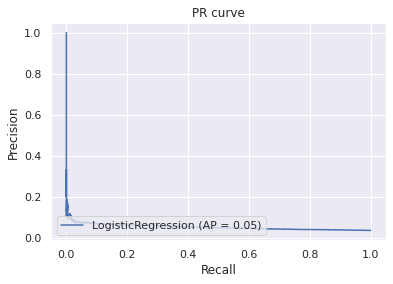

In [ ]:
disp = plot_precision_recall_curve(logreg, Xa_test, y_test)
disp.ax_.set_title('PR curve')
plt.show()

Т.к. доля 1 маленькая, то мы будем много раз "спускаться вниз", и кол-во "подъёмов" будет маленьким. "Подъёмы" в начале по оси Recall обозначают, что классификатор достаточно хорошо отделяет 1 от 0 с такими порогами. 

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

Т.е. ищем порог, где presicion >= 0.95

In [ ]:
prc = precision_recall_curve(y_test, predl)
prc[0] >= 0.95

array([False, False, False, ..., False,  True,  True])

In [ ]:
print('Presicion: {0}\nRecall: {1}\nThreshhold: {2}'.format(prc[0][-2], np.round(prc[1][-2], 4), np.round(prc[2][-2], 2)))

Presicion: 1.0
Recall: 0.0002
Threshhold: 0.25


In [ ]:
print('Откажем такой части:', (predl >= prc[2][-2]).sum() / predl.shape[0])

Откажем такой части: 1.6800651865292375e-05


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

Это задание я сделал вместе со следующим, т.к. из последующего вытекает это

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
srt = np.array(sorted(zip(predl, y_test), key=lambda x: x[0]))
incomes = np.empty((srt.shape[0]))
ind = 0
for border in srt[:, 0]:
    mask = srt[:, 1][srt[:, 0] < border]
    incomes[ind] = -(mask == 1).sum() * 100000 + (mask == 0).sum() * 5000
    ind += 1

print('Max income: {0}\nThreshold: {2}\nОтказали: {1} части'.format(incomes.max(),
                                                                    (predl >= srt[np.argmax(incomes), 1]).sum() / predl.shape[0],
                                                                    srt[np.argmax(incomes), 1]))

Max income: 168200000.0
Threshold: 1.0
Отказали: 0.0 части


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import sys
import random
from operator import itemgetter 
from sklearn.metrics import log_loss

%cd /content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/
%cd vowpal_wabbit/
!make install 
%cd ..

path = '/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab'
input_file = '/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train.csv'
output_file1 = '/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train075.csv'
output_file2 = '/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train025.csv'

In [ ]:
i = open(input_file)
o1 = open(output_file1, 'w')
o2 = open(output_file2, 'w')

counter = 0

for line in i:
	r = random.random()
	if r > 0.75:
		o2.write(line)
	else:
		o1.write(line)

i.close()
o1.close()
o2.close()

In [221]:
def csvtovw_line_ohe(line, rind):
    global label_enc
    global max_col
    global rel_cols
    global cat_f
    answer = []
    splits = line.split(',')
    if splits[1] == '0':
        splits[1] = '-1'
    answer.append(splits[1] + ' ' + str(rind) + '|r')
    ind2 = 0
    for ind in cat_f:
        if splits[ind] not in label_enc[ind2].keys():
            label_enc[ind2][splits[ind]] = max_col
            max_col += 1
        splits[ind] = str(label_enc[ind2][splits[ind]] + 1) + ':1'
        ind2 += 1
    
    answer = answer \
            + list(map(lambda x: str(x[0]) + ':' + str(x[1]), zip(range(2, len(rel_cols) + 2), itemgetter(*rel_cols)(splits)))) \
            + ['|c'] \
            + list(itemgetter(*cat_f)(splits))
    answer = ' '.join(answer) + '\n'
    return answer

def csvtovw_line2_le(line, rind):
    global label_enc
    global rel_cols
    global cat_f
    answer = []
    splits = line.split(',')
    if splits[1] == '0':
        splits[1] = '-1'
    answer.append(splits[1] + ' ' + str(rind) + '|r')
    ind2 = 0
    for ind in cat_f:
        if splits[ind] not in label_enc[ind2].keys():
            label_enc[ind2][splits[ind]] = len(label_enc[ind2]) + 1
        splits[ind] = str(label_enc[ind2][splits[ind]])
        ind2 += 1
    
    answer = answer \
            + list(map(lambda x: str(x[0]) + ':' + str(x[1]), zip(range(2, len(rel_cols) + 2), itemgetter(*rel_cols)(splits)))) \
            + ['|c'] \
            + list(map(lambda x: str(x[0]) + ':' + str(x[1]), zip(range(len(rel_cols) + 2, len(rel_cols) + len(cat_f) + 2), itemgetter(*cat_f)(splits))))
    answer = ' '.join(answer) + '\n'
    return answer

In [227]:
%%time
i1 = open('/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train025.csv')
i2 = open('/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train075.csv')
j1 = open('/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train025_dig.vw', 'w')
j2 = open('/content/drive/My Drive/Colab Notebooks/mmp/mmro_report/hw3/vowpal_rab/train075_dig.vw', 'w')
n_columns = 24
cat_f = [3, 6, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
drop_f = [0, 5, 8, 11, 12]
rel_cols = [n for n in range(n_columns) if n not in cat_f and n not in drop_f and n != 1]
all_columns = [_ for _ in range(n_columns)]
label_enc = [dict() for i in range(len(cat_f))]
max_col = n_columns - len(cat_f) - len(drop_f)
i2.readline()

ind = 0
for line in i1:
    j1.write(csvtovw_line_ohe(line, ind))
    ind += 1
ind = 0
for line in i2:
    j2.write(csvtovw_line_ohe(line, ind))
    ind += 1

i1.close()
i2.close()
j1.close()
j2.close()

CPU times: user 10min 40s, sys: 15.7 s, total: 10min 55s
Wall time: 11min 51s


Параметры, которые я включал/выключал/перебирал значения:
* lr - learning rate
* c - хэширование данных (ускоряет обучение и тестирование)
* hypersearch - их утилита для перебора гиперпараметров (как они пишут, быстрее, чем brute перебор в особенности при использовании -q)
* q - всевозможные пары признаков из namespace'ов или набора конкретных признаков (в конечном clf брал все попарные категориальные признаки)
* passes - кол-во эпох
* holdout_off - не оставляем часть изначального датасета (1/10 по default'у) для валидации на каждой 10 эпохе (по default'у)
* l1, l2 - соотвествующие коэффициенты регуляризации   

Подбираем learning rate c decay_learning_rate 0.8 (на деле: лучший по hypersearch, получился нелучшим на test) 

In [9]:
!perl vowpal_wabbit/utl/vw-hypersearch  -L 1e-4  1 vw -d train075_dig.vw -c --loss_function logistic --link logistic -f clf --passes 5 -q cc --holdout_off -l % --l1 1e-7 --l2 1e-7 -b 25 --decay_learning_rate 0.8

vw-hypersearch: -L: using log-space search
trying 0.0296575966921924 ............................ 0.411158 (best)
trying 0.00337181738081717 ............................ 0.414853
trying 0.113691524495807 ............................ 0.409989 (best)
trying 0.260860225278148 ............................ 0.408586 (best)
trying 0.435833114744041 ............................ 0.407202 (best)
trying 0.598532365837662 ............................ 0.406083 (best)
trying 0.728169669043847 ............................ 0.405281 (best)
trying 0.82196827371784 ............................ 0.404747 (best)
trying 0.885885370916164 ............................ 0.404401 (best)
trying 0.927849472068579 ............................ 0.404182 (best)
trying 0.954772727241134 ............................ 0.404044 (best)
trying 0.971801399009006 ............................ 0.403958 (best)
trying 0.982477210070662 ............................ 0.403905 (best)
trying 0.989133782491618 ...........................

Подбираем learning rate c decay_learning_rate 1 (на деле: лучший по hypersearch, получился нелучшим на test) 

In [10]:
!perl vowpal_wabbit/utl/vw-hypersearch  -L 1e-4  1 vw -d train075_dig.vw -c --loss_function logistic --link logistic -f clf --passes 5 -q cc --holdout_off -l % --l1 1e-7 --l2 1e-7 -b 25

vw-hypersearch: -L: using log-space search
trying 0.0296575966921924 ............................ 0.410859 (best)
trying 0.00337181738081717 ............................ 0.414494
trying 0.113691524495807 ............................ 0.409176 (best)
trying 0.260860225278148 ............................ 0.407109 (best)
trying 0.435833114744041 ............................ 0.405111 (best)
trying 0.598532365837662 ............................ 0.403558 (best)
trying 0.728169669043847 ............................ 0.402482 (best)
trying 0.82196827371784 ...........................^C


Подбираем passes (на деле: лучший по hypersearch, получился <b>лучшим</b> на test) 

In [ ]:
!perl vowpal_wabbit/utl/vw-hypersearch 3 20 vw -d train075_dig.vw -c --loss_function logistic --link logistic -f clf --passes % -q cc --holdout_off -l 1 --l1 1e-7 --l2 1e-7 -b 25

trying 13 ............................. 0.404313 (best)
trying 9 ............................. 0.402806 (best)
trying 7 ............................ 0.401829 (best)
trying 5 ............................ 0.400584 (best)
trying 4 ...........................

Подбираем l2 (на деле: параметр очень маленький, так что его равенство 0 почти равносильно) 

In [21]:
!perl vowpal_wabbit/utl/vw-hypersearch -L 1e-13 1 vw -d train075_dig.vw -c --loss_function logistic --link logistic -f clf --passes 5 -q cc --holdout_off --l2 % 

vw-hypersearch: -L: using log-space search
trying 1.0825347684256e-05 ............................ 0.408123 (best)
trying 9.23757859024117e-09 ............................ 0.390743 (best)
trying 1.17188152485027e-10 ............................ 0.390367 (best)
trying 7.88268984052926e-12 ............................ 0.390363 (best)
trying 1.48665182641714e-12 ............................ 0.390363 (best)
loss(1.48665e-12) == loss(7.88269e-12): 0.390363
trying 3.42327551454782e-12 ...........................^C


Лучшие параметры

In [24]:
!vw -d train075_dig.vw -c --loss_function logistic --link logistic -f clf --passes 5 -q cc --holdout_off

creating quadratic features for pairs: cc 
final_regressor = clf
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train075_dig.vw.cache
ignoring text input in favor of cache input
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.5000      154
0.453566 0.213985            2            2.0  -1.0000   0.1926      154
0.290942 0.128318            4            4.0  -1.0000   0.1767      155
0.232791 0.174640            8            8.0  -1.0000   0.0315      154
0.447731 0.662672           16           16.0  -1.0000   0.2230      155
0.583358 0.718985           32           32.0   1.0000   0.5855      154
0.682730 0.782101           64           64.0   1.0000   0.0638      154
0.596953 0.511177          128          128.0   1.000

In [25]:
!vw -t -i clf -p p_out -d train025_dig.vw -c
with open('p_out') as pred_file:
    preds = [float(label.split(' ')[0]) for label in pred_file.readlines()]
with open('train025_dig.vw') as test:
    test = [float(line.split(' ')[0]) for line in test.readlines()]

creating quadratic features for pairs: cc 
only testing
predictions = p_out
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using cache_file = train025_dig.vw.cache
ignoring text input in favor of cache input
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.778867 0.778867            1            1.0  -1.0000   0.1321      154
0.532952 0.287037            2            2.0  -1.0000   0.1772      154
1.710931 2.888909            4            4.0   1.0000   0.2566      154
1.624517 1.538102            8            8.0  -1.0000   0.1192      154
1.557076 1.489636           16           16.0  -1.0000   0.0818      154
1.728925 1.900774           32           32.0  -1.0000   0.0221      155
3.039648 4.350370           64           64.0  -1.0000   0.0910      155
2.955357 2.871066          128          128.0  -1.0000   0.1923   

In [26]:
print('AUC-ROC: {0}'.format(roc_auc_score(test, preds)))

AUC-ROC: 0.7522280167540752


Занимательные факты и возможности vowpal-wabbit:
* Vowpal Wabbit классификация в случае большого числа классов может обучаться за логарифмическое время
* можем определять Namespace и брать попарные признаки из 2 namespace (удобно), автоматически удаляются клоны получившихся признаков(с точностью до перестановки)
* можем тренировать sigmoidal feedforward net
* vw по дефолту не хэширует вещественные признаки, но, используя --hash all, хэшируются все. Это помогает распараллеливания вычислений 

______________________________________________________________________________  

https://github.com/mmp-mmro-team/mmp_mmro_fall_2020/blob/master/seminars/sem03-sklearn-linreg.ipynb  
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html  
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html